In [1]:
import numpy as np
from numpy import argsort
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import os
import math
import pickle
import joblib
from itertools import chain
import glob
import seaborn as sns
import matplotlib.font_manager as font_manager
import seaborn as sns
import matplotlib as mpl
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.utils import shuffle
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
register_matplotlib_converters()
sns.set_theme()
mpl.matplotlib_fname()
font_dirs = ['D:\\Software\\Anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf' ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
mpl.font_manager._rebuild()
result = font_manager.findfont("Rounded Mplus 1c")
print(result)
mpl.rc('font', family='Rounded Mplus 1c')


## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

le = LabelEncoder()
ss = StandardScaler()
mms = MinMaxScaler()

Matplotlib is building the font cache; this may take a moment.


D:\Software\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\MPLUSRounded1c-Regular.ttf


In [2]:
names = [
         "Gradient_Boosting", 
         "Decision_Tree", 
         "Extra_Trees", 
         "Random_Forest",
         "XGBoost",
         "LGBMRegressor"
]
models = [
    GradientBoostingRegressor(),
    DecisionTreeRegressor(max_depth=5),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    LGBMRegressor()
]

In [3]:
def line_plot(x , y,data, rotate,hue = None):
    plt.figure(figsize=(12,8))
    sns.lineplot(x = x, y = y, hue = hue, data = data)
    if rotate == True:
        plt.xticks(rotation = 'vertical')

def box_plot(x, y, data,  rotate,hue = None):
    plt.figure(figsize=(12,8))
    sns.boxplot(x = x, y = y, hue = hue, data = data)
    if rotate == True:
        plt.xticks(rotation = 'vertical')
        
def scatter_plot(x, y, data,  rotate,hue = None):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x = x, y = y, hue = hue, data = data)
    if rotate == True:
        plt.xticks(rotation = 'vertical')
        
def bar_plot(x, y, data, rotate, hue = None):
    plt.figure(figsize=(15,14))
    sns.barplot(x = x, y = y, hue = hue, data = data)
    if rotate == True:
        plt.xticks(rotation = 'vertical')
    
def make_group ( list_group, feat, func, data):
    df = data.groupby(list_group).agg({feat:func}).reset_index().rename(columns ={feat : func}).sort_values(by =[func], ascending = False)
#     df['percentage'] = round(df['count']/df['count'].sum()*100,2)
    return df


def fill_NA(data):
    for col in data.columns[data.dtypes == 'object']:
       data[col]  = data[col].fillna('unknown')
    
    for col in data.columns[data.dtypes == 'float64']:
       data[col]  = data[col].fillna(0)
    
    for col in data.columns[data.dtypes == 'int64']:
       data[col]  = data[col].fillna(0)

In [156]:
df = pd.read_csv("used_car.csv", index_col = False)
df.drop(columns=['created_at','updated_at'],inplace = True)

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='percent_null', ylabel='features'>

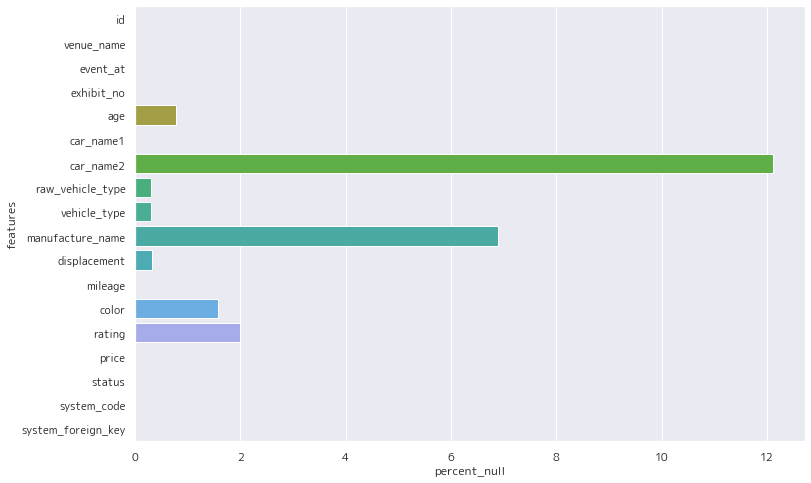

In [157]:
check_null = round(df.isnull().sum()/df.shape[0]*100,2).reset_index(name = "percent_null").rename(columns={'index':'features'})
plt.figure(figsize=(12,8))
sns.barplot(x=check_null.percent_null, y = check_null.features, data = check_null)


In [158]:
df.describe()
df.describe(include='O')

,id,exhibit_no,age,displacement,mileage,price,system_foreign_key
count,1.057172e+06,1.057172e+06,1.049084e+06,1.053773e+06,1.057172e+06,1.057172e+06,1.057172e+06
mean,5.285865e+05,2.200722e+04,2.009732e+03,1.871979e+03,1.192132e+05,5.086282e+05,8.863750e+03
std,3.051794e+05,2.819581e+04,5.963725e+00,2.606926e+03,1.394068e+05,7.334954e+05,5.088460e+03
min,1.000000e+00,1.000000e+00,1.932000e+03,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.642938e+05,3.018000e+03,2.006000e+03,6.600000e+02,5.700000e+04,1.030000e+05,4.460000e+03
50%,5.285865e+05,7.022000e+03,2.010000e+03,1.500000e+03,9.600000e+04,2.410000e+05,8.955000e+03
75%,7.928792e+05,3.301100e+04,2.014000e+03,2.000000e+03,1.415620e+05,6.360000e+05,1.320400e+04
max,1.057172e+06,9.901500e+04,2.026000e+03,9.999900e+04,9.999999e+06,9.000000e+07,1.754500e+04


,venue_name,event_at,car_name1,car_name2,raw_vehicle_type,vehicle_type,manufacture_name,color,rating,status,system_code
count,1057172,1057172,1057172,929109,1054020,1054009,984366,1040590,1036127,1057172,1057172
unique,84,126,8315,63955,23177,16080,47,4470,50,3,1
top,ミライブ埼玉,2022-01-11,ﾌﾟﾘｳｽ,X,NHP10,NHP10,ﾄﾖﾀ,ｼﾙﾊﾞｰ,3.5,落札,JUNAVI
freq,57186,17009,29926,36335,19319,21257,358028,179015,353815,1038749,1057172


In [159]:
df['event_at']  = pd.to_datetime(df['event_at'], format='%Y-%m-%d')
df['month'] =  df['event_at'].dt.month.astype(int)
df['year'] = df['event_at'].dt.year.astype(int)

In [9]:
fill_NA(df)
df

,id,venue_name,event_at,exhibit_no,age,car_name1,car_name2,raw_vehicle_type,vehicle_type,manufacture_name,displacement,mileage,color,rating,price,status,system_code,system_foreign_key,month,year
0,124320,ＪＵ埼玉,2021-10-19,3,2015.0,ﾊｲｾﾞｯﾄｶｰｺﾞ,unknown,S321V,S321V,ﾀﾞｲﾊﾂ,660.0,237951,ｼﾙﾊﾞｰ,R小,183000,落札,JUNAVI,2071,10,2021
1,124321,ＪＵ埼玉,2021-10-19,4,2003.0,ｷｬﾘｰT,4WD,DA63T,DA63T,ｽｽﾞｷ,660.0,75770,ｼﾛ,R小,167000,落札,JUNAVI,2071,10,2021
2,124322,ＪＵ埼玉,2021-10-19,6,2010.0,ｴﾌﾞﾘｨW,4WD PZﾀｰﾎﾞ ﾋｮｳｼﾞｭﾝﾙｰﾌ,DA64W,DA64W,ｽｽﾞｷ,660.0,146339,ｱｵ,3.5,234000,落札,JUNAVI,2071,10,2021
3,124323,ＪＵ埼玉,2021-10-19,7,2011.0,ﾜｺﾞﾝR,FX,MH23S,MH23S,ｽｽﾞｷ,660.0,33243,ｼﾙﾊﾞｰ,3.5,225000,落札,JUNAVI,2071,10,2021
4,124324,ＪＵ埼玉,2021-10-19,8,2013.0,ｴﾌﾞﾘｨW,PZﾀｰﾎﾞ,DA64W,DA64W,ｽｽﾞｷ,660.0,199695,ﾊﾟｰﾙ,3.5,226000,落札,JUNAVI,2071,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057167,1057168,ＩＭＡ九州,2022-03-03,3098,2005.0,ﾃﾞｭﾄﾛ,冷蔵･冷凍車,XZU411M,XZU411M,日野自動車,4890.0,198000,白,3,385000,落札,JUNAVI,17545,3,2022
1057168,1057169,ＩＭＡ九州,2022-03-03,3100,1998.0,ｷｬﾝﾀｰ,ﾀﾞﾝﾌﾟ,FE517BD,FE517BD,ﾐﾂﾋﾞｼ,4210.0,243000,青,RA,906000,落札,JUNAVI,17545,3,2022
1057169,1057170,ＩＭＡ九州,2022-03-03,3101,2011.0,ｷｬﾝﾀｰ,ﾀﾞﾌﾞﾙｷｬﾌﾞ,FBA20,FBA20,unknown,2990.0,152000,白,3.5,316000,落札,JUNAVI,17545,3,2022
1057170,1057171,ＩＭＡ九州,2022-03-03,3102,1994.0,ｴﾙﾌ,ｸﾚｰﾝ付,NPR66LR,NPR66LR,いすゞ,4330.0,551000,白,W,730000,落札,JUNAVI,17545,3,2022


In [10]:
df.describe()
df.describe(include='O')

,id,exhibit_no,age,displacement,mileage,price,system_foreign_key,month,year
count,1.057172e+06,1.057172e+06,1.057172e+06,1.057172e+06,1.057172e+06,1.057172e+06,1.057172e+06,1.057172e+06,1.057172e+06
mean,5.285865e+05,2.200722e+04,1.994356e+03,1.865960e+03,1.192132e+05,5.086282e+05,8.863750e+03,7.103945e+00,2.021411e+03
std,3.051794e+05,2.819581e+04,1.752138e+02,2.604889e+03,1.394068e+05,7.334954e+05,5.088460e+03,4.642981e+00,4.920698e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,2.021000e+03
25%,2.642938e+05,3.018000e+03,2.006000e+03,6.600000e+02,5.700000e+04,1.030000e+05,4.460000e+03,2.000000e+00,2.021000e+03
50%,5.285865e+05,7.022000e+03,2.010000e+03,1.500000e+03,9.600000e+04,2.410000e+05,8.955000e+03,1.000000e+01,2.021000e+03
75%,7.928792e+05,3.301100e+04,2.014000e+03,2.000000e+03,1.415620e+05,6.360000e+05,1.320400e+04,1.100000e+01,2.022000e+03
max,1.057172e+06,9.901500e+04,2.026000e+03,9.999900e+04,9.999999e+06,9.000000e+07,1.754500e+04,1.200000e+01,2.022000e+03


,venue_name,car_name1,car_name2,raw_vehicle_type,vehicle_type,manufacture_name,color,rating,status,system_code
count,1057172,1057172,1057172,1057172,1057172,1057172,1057172,1057172,1057172,1057172
unique,84,8315,63956,23178,16081,48,4471,51,3,1
top,ミライブ埼玉,ﾌﾟﾘｳｽ,unknown,NHP10,NHP10,ﾄﾖﾀ,ｼﾙﾊﾞｰ,3.5,落札,JUNAVI
freq,57186,29926,128063,19319,21257,358028,179015,353815,1038749,1057172


# check SHAP Value

In [20]:
df_shap  = df.copy()

In [21]:
for col in df_shap.columns[df_shap.dtypes == object]:
    print(col, df_shap[col].nunique())
    df_shap[col] = df_shap[col].fillna("unknown")
    df_shap[col] = le.fit_transform(df_shap[col].values)

for col in df_shap.columns[df_shap.dtypes == 'float64']:
    df_shap.fillna(df_shap[col].mean(), inplace=True)

venue_name 84
car_name1 8315
car_name2 63956
raw_vehicle_type 23178
vehicle_type 16081
manufacture_name 48
color 4471
rating 51
status 3
system_code 1


In [22]:
data_shap =df_shap.drop(columns = ['price','event_at'])
target_shap =df_shap['price']

x_train,x_test,y_train_shap,y_test_shap = train_test_split (data_shap, target_shap, test_size=0.3,random_state=42)

In [25]:
extra_tree = ExtraTreesRegressor(random_state=42, verbose=2)
extra_tree.fit(x_train, y_train_shap)

"""
Provided code:
explainer = shap.Explainer(extra_tree) 
"""
# Our Code
explainer = shap.TreeExplainer(extra_tree) 

# Visualize one value
single_shap_value = explainer(x_test.sample(n=1))
shap.summary_plot(single_shap_value, feature_names=X_test.columns, plot_type='bar')
plt.show()

# Visualize all values
shap_values = explainer(x_test)
shap.summary_plot(shap_values, feature_names=x_test.columns)
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.8min finished


ExtraTreesRegressor(random_state=42, verbose=2)

'\nProvided code:\nexplainer = shap.Explainer(extra_tree) \n'

NameError: name 'X_test' is not defined

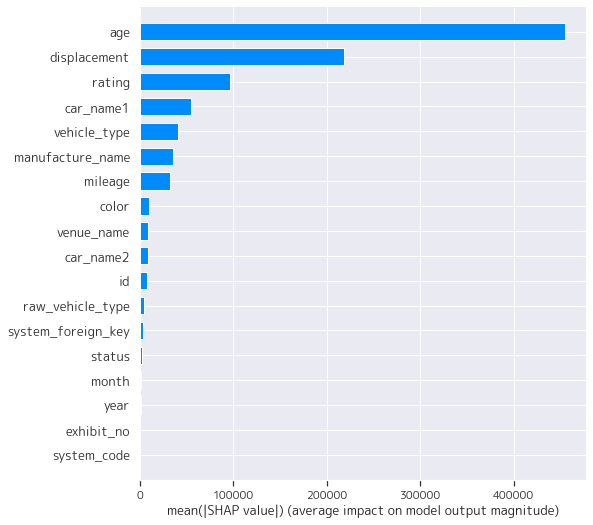

In [ ]:
single_shap_value = explainer(x_test.sample(n=1))
shap.summary_plot(single_shap_value, feature_names=x_test.columns, plot_type='bar')
plt.show()

# Visualize all values
shap_values = explainer(x_test)
shap.summary_plot(shap_values, feature_names=x_test.columns)
plt.show()

In [ ]:
df.skew()

<AxesSubplot:>

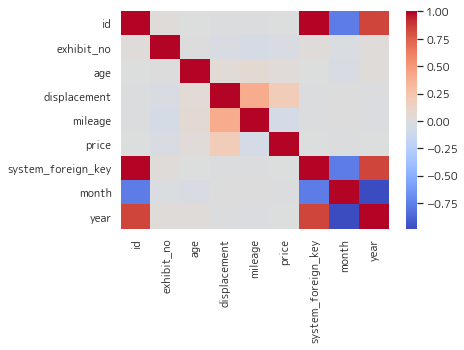

In [11]:
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm')

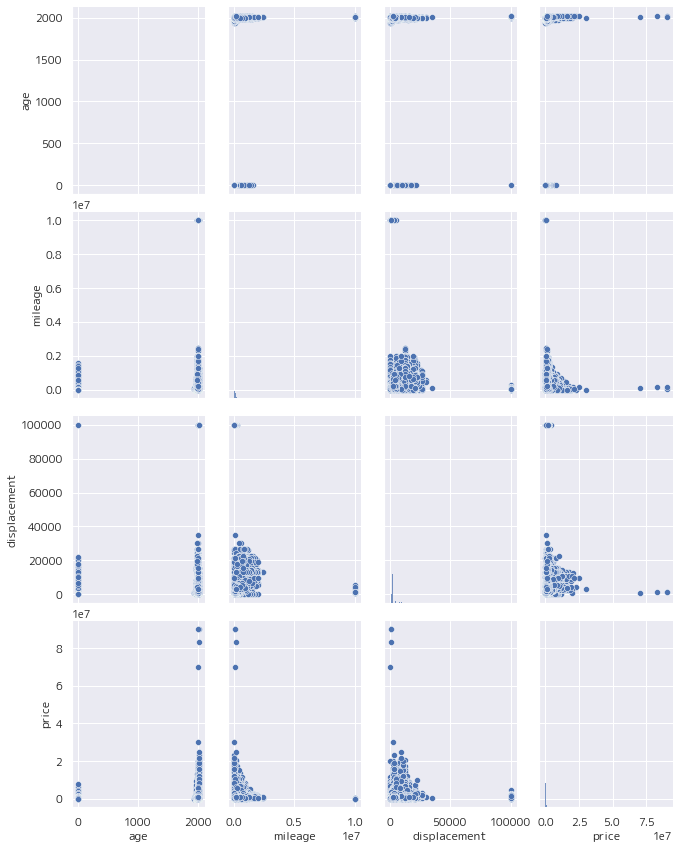

In [42]:
sns.pairplot(df[['age','mileage','displacement','price']],size=3, aspect=0.8)

In [9]:
top5_man =make_group(['manufacture_name'], 'price', 'count', df).head(5)
top5_man

,manufacture_name,count
25,ﾄﾖﾀ,337316
26,ﾆｯｻﾝ,133784
35,ﾎﾝﾀﾞ,123879
23,ﾀﾞｲﾊﾂ,92174
19,ｽｽﾞｷ,89311


In [10]:
make_group(['manufacture_name','vehicle_type'], 'price', 'count', df).head(5)

,manufacture_name,vehicle_type,count
12210,ﾄﾖﾀ,NHP10,20156
12718,ﾄﾖﾀ,ZVW30,15991
11201,ﾀﾞｲﾊﾂ,L375S,8796
12940,ﾆｯｻﾝ,E12,8378
13982,ﾎﾝﾀﾞ,GE6,7720


In [11]:
make_group(['vehicle_type'], 'price', 'count', df).head(5)

,vehicle_type,count
11448,NHP10,20156
15726,ZVW30,15991
10129,L375S,8796
4817,E12,8378
8601,GE6,7746


,manufacture_name,count,percent


,count,percent
count,48.000000,48.000000
mean,22024.416667,2.082917
std,60250.408103,5.699415
min,2.000000,0.000000
25%,45.000000,0.000000
50%,408.000000,0.040000
75%,6590.500000,0.625000
max,358028.000000,33.870000


,manufacture_name,count,percent
25,ﾄﾖﾀ,358028,33.87
26,ﾆｯｻﾝ,141920,13.42
35,ﾎﾝﾀﾞ,131438,12.43
23,ﾀﾞｲﾊﾂ,97869,9.26
19,ｽｽﾞｷ,94769,8.96
2,unknown,72806,6.89
39,ﾏﾂﾀﾞ,45163,4.27
41,ﾐﾂﾋﾞｼ,33645,3.18
20,ｽﾊﾞﾙ,31167,2.95
33,ﾌｫﾙｸｽﾜｰｹﾞﾝ,8619,0.82


,manufacture_name,median


,median
count,4.800000e+01
mean,5.866146e+05
std,1.358898e+06
min,6.000000e+03
25%,1.600000e+05
50%,2.620000e+05
75%,6.137500e+05
max,9.495500e+06


,manufacture_name,median
31,ﾌｪﾗｰﾘ,9495500
9,ｱﾊﾞﾙﾄ,1495500
43,ﾗﾝﾄﾞﾛｰﾊﾞｰ,1262500
24,ﾃﾞｲﾑﾗｰ,1104000
18,ｼﾞｰﾌﾟ,1016500
27,ﾊﾏｰ,1011500
46,ﾚｸｻｽ,1006000
37,ﾎﾟﾙｼｪ,822500
2,unknown,740000
38,ﾏｾﾗﾃｨ,666000


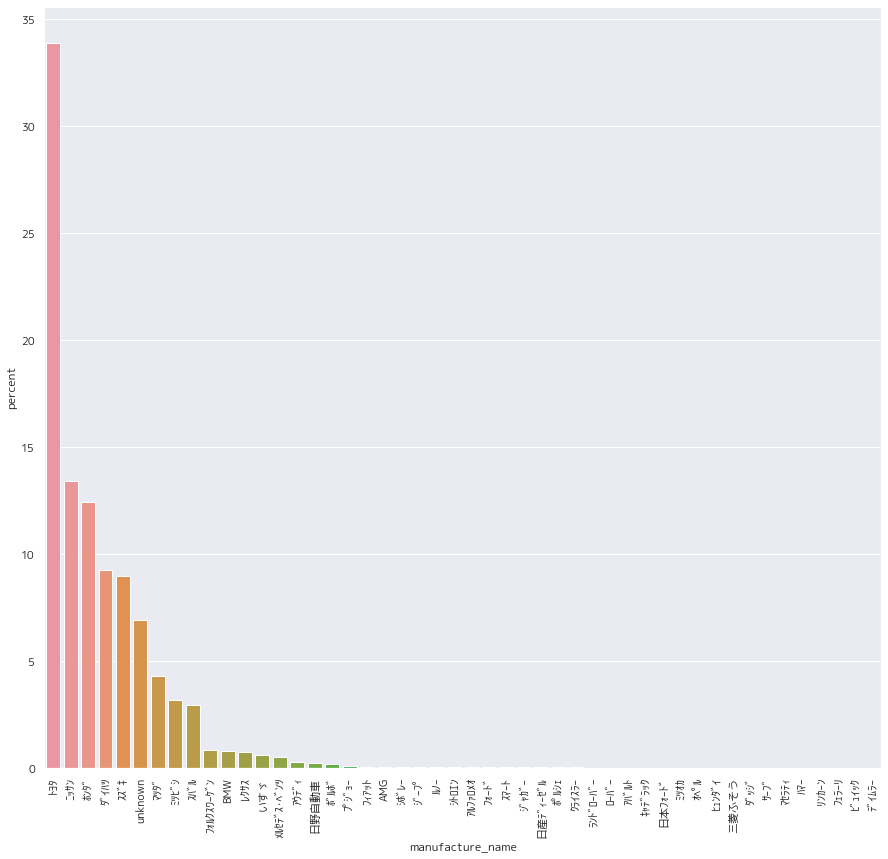

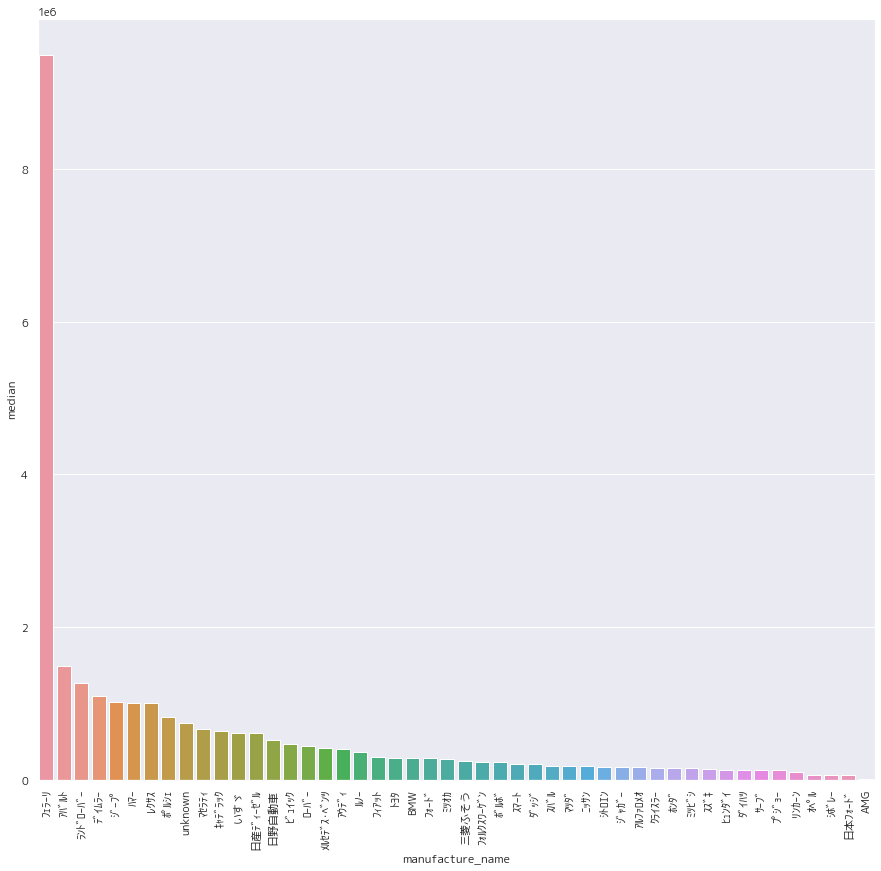

In [89]:
a = make_group(['manufacture_name'],'price','count',df)
a['percent'] = round(a['count']/a['count'].sum()*100,2)
bar_plot('manufacture_name', 'percent', a, True)
a[a['count'] == 1]
a.describe()
a
b = make_group(['manufacture_name'],'price','median',df)
# a['percent'] = round(a['count']/a['count'].sum()*100,2)
bar_plot('manufacture_name', 'median', b,True)
b[b['median'] == 0]
b.describe()
b

In [60]:
b  = make_group(['manufacture_name','venue_name'],'price','mean',df)
# b['percent'] = round(b['count']/b['count'].sum()*100,5)
b

,manufacture_name,venue_name,mean
1376,ﾌｪﾗｰﾘ,ミライブ愛知,1.039000e+07
1377,ﾌｪﾗｰﾘ,ＪＵ福岡・鹿児島,8.601000e+06
2050,ﾗﾝﾄﾞﾛｰﾊﾞｰ,ＴＡＡ広島,6.800000e+06
2130,ﾚｸｻｽ,日産プラザソル大阪,4.311000e+06
1757,ﾎﾟﾙｼｪ,ＴＡＡ四国,4.067000e+06
...,...,...,...
511,ｵﾍﾟﾙ,ＴＡＡ四国,2.500000e+04
706,ｼﾎﾞﾚｰ,ＴＡＡ北海道,2.450000e+04
257,日本ﾌｫｰﾄﾞ,ＪＵ長野,2.050000e+04
696,ｼﾎﾞﾚｰ,ＪＵ青森,1.600000e+04


In [52]:
df.groupby('venue_name').size().sort_values(ascending=False)

venue_name
ミライブ埼玉        57186
ＣＡＡ中部         48339
アライ小山ＶＴ       48273
ＴＡＡ横浜         47183
ＪＵ愛知          43480
              ...  
日産プラザソル福岡       586
日産プラザソル仙台       575
ＪＵ山梨            501
ＮＡＡ名古屋入札会       400
日産プラザソル苫小牧      260
Length: 84, dtype: int64

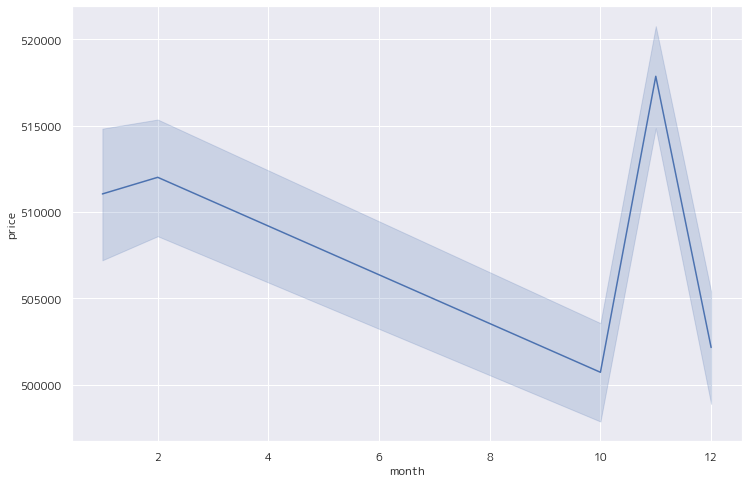

In [12]:
line_plot('month', 'price', df)

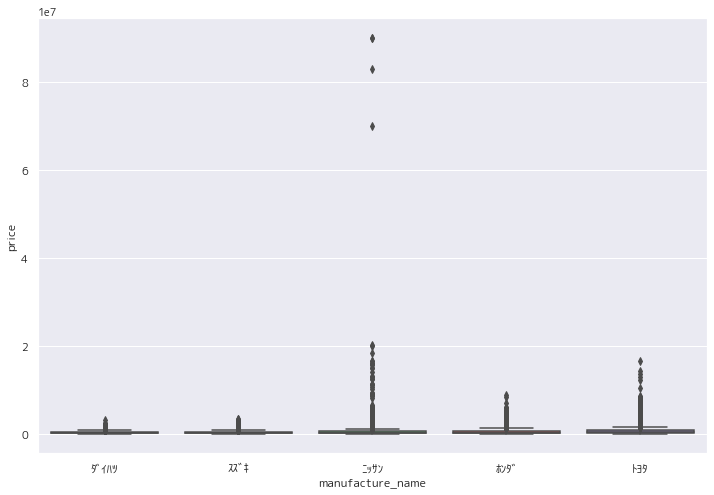

In [13]:
box_plot('manufacture_name','price',df[df['manufacture_name'].isin(list(top5_man['manufacture_name']))])

<Figure size 864x576 with 0 Axes>

(1920.0, 2023.0)

<AxesSubplot:xlabel='price', ylabel='age'>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='price', ylabel='mileage'>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='price', ylabel='displacement'>

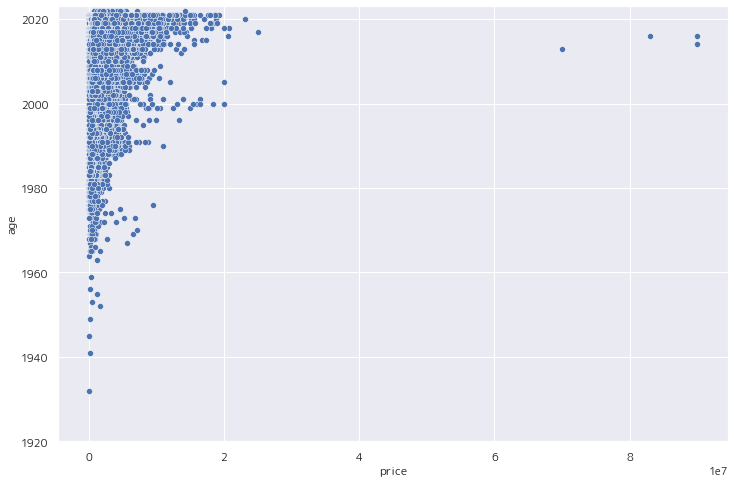

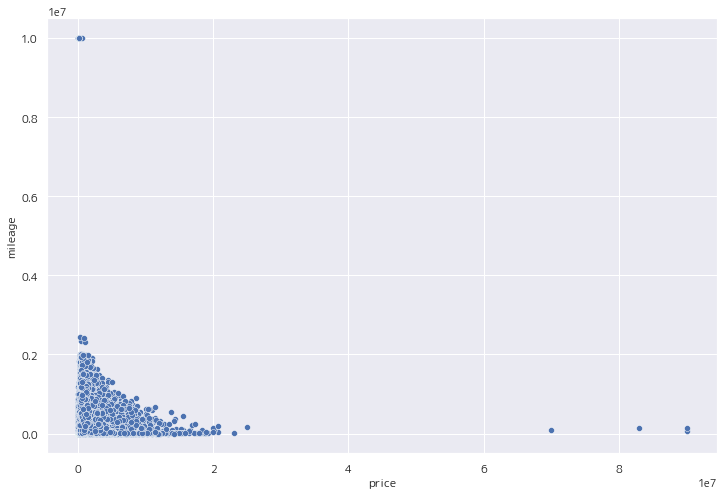

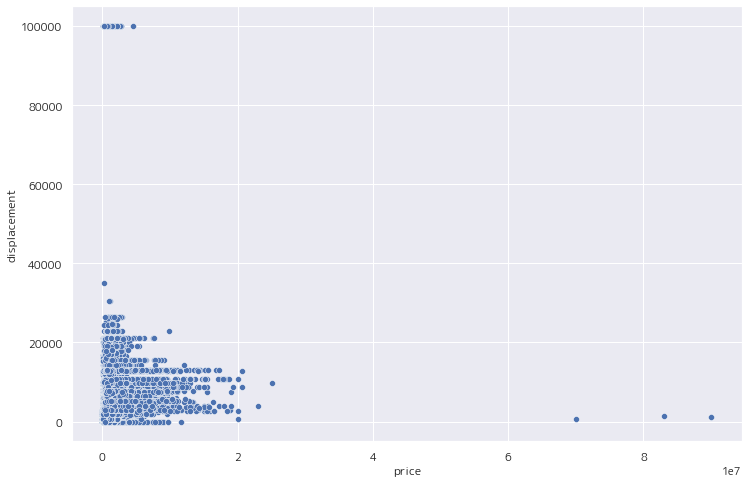

In [32]:
plt.figure(figsize=(12,8))
plt.ylim(1920, 2023)
sns.scatterplot(x='price',y='age',data = df)

plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='mileage',data = df)

plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='displacement',data = df)

,age,count
54,2007.0,68182
56,2009.0,67832
63,2016.0,64084
58,2011.0,62428
60,2013.0,60346
55,2008.0,59952
53,2006.0,57554
59,2012.0,56964
57,2010.0,56902
52,2005.0,50674


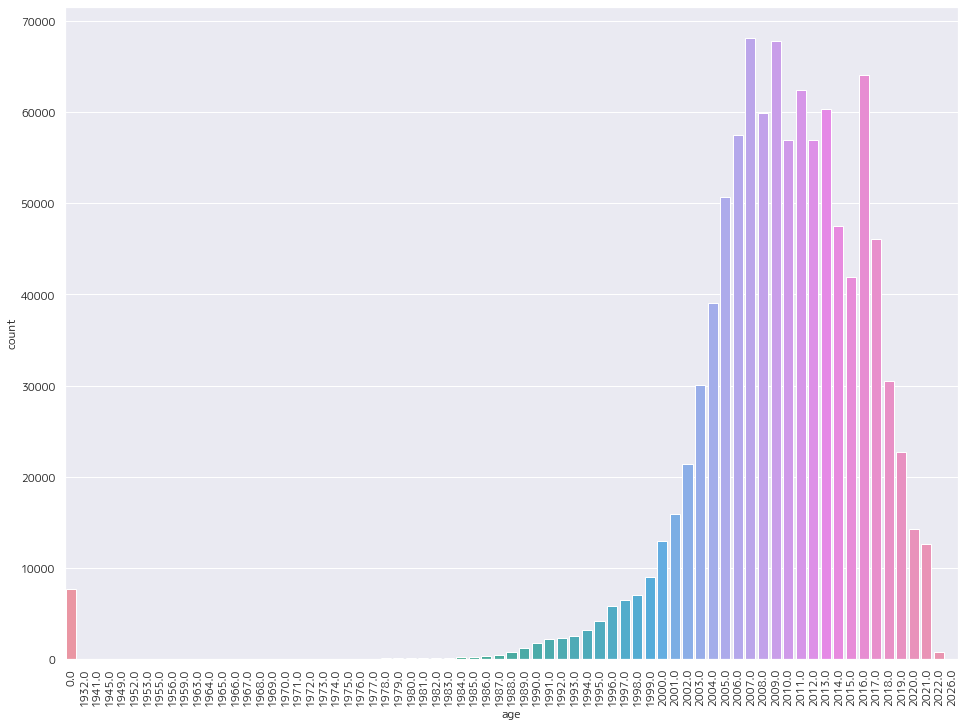

In [15]:
test = make_group(['age'],'price','count',df)
test[test['count'] > 1]
bar_plot('age','count',test,True)

In [120]:
make_group(['month'],'price','median',df)

,month,median
3,11,250000
1,2,243000
2,10,242000
0,1,240000
4,12,232000


In [124]:
df['month'].unique()

array([10, 11, 12,  1,  2])

In [129]:
make_group(['vehicle_type','price'],'price','count',df)

ValueError: cannot insert price, already exists

In [167]:
a = df.groupby(['vehicle_type','price'])['price'].count().reset_index(name = 'count')
a
b = a.groupby(['vehicle_type'])['count'].max().reset_index(name = 'max_freq').sort_values(by=['max_freq'],ascending = False)
b

,vehicle_type,price,count
0,+,663000,1
1,-110F-,298000,1
2,-111-,2724000,1
3,-112800-,350000,1
4,-124092-,402000,1
...,...,...,...
398300,ﾌﾒｲ,6608000,1
398301,ﾌﾒｲ,7015000,1
398302,ﾌﾒｲ,8383000,1
398303,ﾌﾒｲ,8795000,1


,vehicle_type,max_freq
9025,H81W,305
10830,MH21S,289
10093,L250S,253
9501,JB5,216
10066,L175S,211
...,...,...
5832,FD7JDYA,1
5833,FD7JEFA,1
5834,FD7JEWA,1
5835,FD7JGAA,1


In [134]:
##############################################################################################

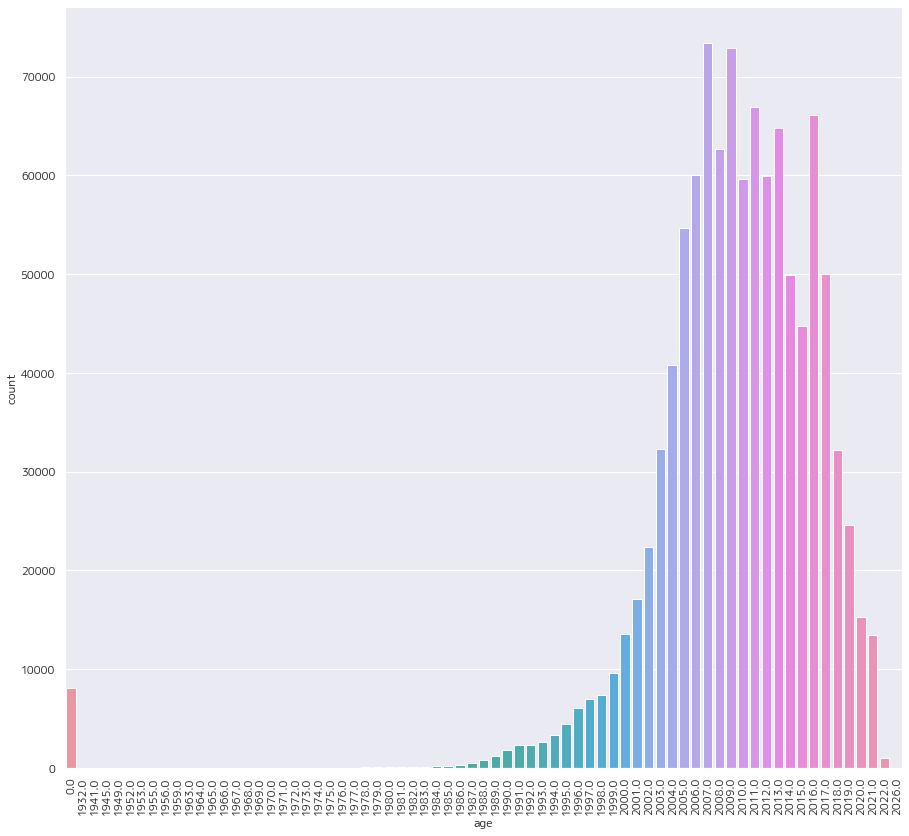

Error in callback <function flush_figures at 0x000001B86B279C10> (for post_execute):


KeyboardInterrupt: 

In [91]:
a = make_group(['age',],'price','count',df)
b = make_group(['displacement',],'price','count',df)
c = make_group(['manufacture_name'],'price','median',df)
d = make_group(['manufacture_name'],'price','count',df)
e = make_group(['vehicle_type'],'price','count',df)
bar_plot(a['age'], a['count'], a, True)
bar_plot(b['displacement'], b['count'], b, False)
bar_plot(c['manufacture_name'], c['median'], c, True)
bar_plot(d['manufacture_name'], d['count'], d, True)
# bar_plot(e['vehicle_type'], e['count'], e.head(), True)


In [6]:
df_add_feat_model = pd.read_csv('add_feat_mean_median_model.csv',index_col=False)
df_add_feat_hybrid = pd.read_csv('add_feat_mean_median_hybrid.csv',index_col=False)


In [9]:
df_add_feat_hybrid.columns

Index(['Vị trí_ロケーション', 'Ngày bán hàng_売上日', 'Tháng bán hàng_売上月',
       'Năm bán hàng_売上年', 'Ngày nhập_入力日', 'Đầu vào tháng_入力月',
       'Năm đầu vào_入力年', 'Bộ phận bán hàng_売上部門', 'Người bán hàng_売上担当',
       'Phân loại bán hàng_売上分類', 'Mã đích bán hàng_売上先コード',
       'Tên khách hàng_売上先名', 'Số nhập kho_入庫番号', 'Mã loại phụ tùng_商品コード',
       'Tên phụ tùng_商品名', 'Nhà sản xuất_メーカー', 'Tên xe_車名', 'Model xe_車輌型式',
       'Engine model_エンジン型式', 'Số lượng_数量', 'Đơn giá bán hàng_売上単価',
       'Sản lượng bán ra_売上金額', 'Đơn giá mua_仕入単価', 'Tổng giá nhập_仕入合計',
       'Tiền công_工賃', 'Chi phí_経費', 'Nguồn nhập hàng_仕入先',
       'Bộ phận mua hàng_仕入部門', 'Nhân viên thu mua_仕入担当',
       'Phụ trách sản xuất_生産担当', 'Truyền động 1_駆動1', 'TM_TM',
       'Truyền động 2_駆動2', 'Chi tiết_詳細', 'Phí tái chế_リサイクル料',
       'Số km đã chạy_走行距離', 'Năm sản xuất_年式',
       'Phân loại mang đến/đón_持込・引取区分', 'Tình trạng engine_エンジン状態',
       'Đã gửi tiền_預託済', 'Loại xe_車種', 'Đang tải nguồn_積込元',
       'C

In [116]:
df_add_feat_hybrid.isnull().sum().loc['Năm sản xuất_年式']

243525

In [7]:
df.rename(columns={'vehicle_type': 'Model xe_車輌型式'},inplace=True)

In [8]:
median = df.groupby(['Model xe_車輌型式'])['price'].median().reset_index(name = 'median_database')
median

,Model xe_車輌型式,median_database
0,+,663000
1,-110F-,298000
2,-111-,2724000
3,-112800-,350000
4,-124092-,402000
...,...,...
16075,不明,785000
16076,ｶﾞﾚｰｼﾞ,10000
16077,ｸﾎﾞﾀBA,755000
16078,ｸﾐﾀﾃ,123000


In [11]:
df_add_feat_hybrid =  pd.merge(df_add_feat_hybrid, median, on=['Model xe_車輌型式'],how ='left')
df_add_feat_hybrid.head()

,Vị trí_ロケーション,Ngày bán hàng_売上日,Tháng bán hàng_売上月,Năm bán hàng_売上年,Ngày nhập_入力日,Đầu vào tháng_入力月,Năm đầu vào_入力年,Bộ phận bán hàng_売上部門,Người bán hàng_売上担当,Phân loại bán hàng_売上分類,...,mean,mean_auction,median,median_auction,Iron,Harness,Alumi,New_York_Gas_Price,US_Gulf_Gas_Price,median_database
0,会宝産業本社,19,2,2010,19,2,2010,輸出課,四宮 学,NaN,...,NaN,NaN,NaN,NaN,25.5,282.0,163.0,1.963,1.966,NaN
1,会宝産業本社,29,7,2009,29,7,2009,輸出課,嵩原カルソンジェイ,NaN,...,NaN,NaN,NaN,NaN,21.2,187.0,100.0,1.750,1.705,NaN
2,会宝産業本社,14,1,2009,15,1,2009,輸出課,近藤高行,NaN,...,NaN,NaN,NaN,NaN,21.0,90.0,70.0,1.146,1.148,NaN
3,会宝産業本社,14,1,2009,15,1,2009,輸出課,近藤高行,NaN,...,29773.454844,NaN,28000.0,NaN,21.0,90.0,70.0,1.146,1.148,114000.0
4,会宝産業本社,1,3,2010,3,3,2010,輸出課,四宮 学,NaN,...,NaN,NaN,NaN,NaN,28.5,240.0,160.0,2.140,2.137,NaN


In [99]:
list_best_acc = ['エンジン','ＣＫＤ／コンプリート','ノーズカット（個別）','Ｒアクスル（生/Ｄ']
list_feature = [
                'Tên phụ tùng_商品名',
                'Model xe_車輌型式',
                'Engine model_エンジン型式',
                'Đơn giá bán hàng_売上単価',
                'Quốc gia_国',
                'Tháng bán hàng_売上月',
                 'median',
                 'median_auction',
#                  'median_database',
                 'Năm bán hàng_売上年',
               ]

In [100]:
df_best_acc =  df_add_feat_hybrid[df_add_feat_hybrid.apply(lambda x: x['Tên phụ tùng_商品名'] in list_best_acc, axis=1)]
df_best_feature = df_best_acc[list_feature]
df_best_feature.drop(df_best_feature[df_best_feature.apply(lambda x: pd.isna(x['Model xe_車輌型式'])== True, axis = 1)].index, inplace = True)

In [101]:
for col in df_best_feature.columns[df_best_feature.dtypes == object]:
    print(col, df_best_feature[col].nunique())
    df_best_feature[col] = df_best_feature[col].fillna("unknown")

for col in df_best_feature.columns[df_best_feature.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
      df_best_feature.fillna(0, inplace=True)

Tên phụ tùng_商品名 3
Model xe_車輌型式 3917
Engine model_エンジン型式 1235
Quốc gia_国 52


In [102]:
df_best_feature.isnull().sum()

Tên phụ tùng_商品名         0
Model xe_車輌型式            0
Engine model_エンジン型式      0
Đơn giá bán hàng_売上単価    0
Quốc gia_国               0
Tháng bán hàng_売上月       0
median                   0
median_auction           0
Năm bán hàng_売上年         0
dtype: int64

In [103]:
# with open("encoder/parts.pkl","rb") as f:
#     le_parts = pickle.load(f)
    
# with open("encoder/vehicle_model.pkl","rb") as f:
#     le_model = pickle.load(f)

# with open("encoder/engine_model.pkl","rb") as f:
#     le_engine = pickle.load(f)

# with open("encoder/customer.pkl","rb") as f:
#     le_customer = pickle.load(f)

le_part = LabelEncoder()
le_parts = LabelEncoder()
le_model = LabelEncoder()
le_engine =  LabelEncoder()
le_nation = LabelEncoder()

# le_part.fit_transform(list_best_acc)
le_parts.fit(df_best_feature['Tên phụ tùng_商品名'])
# le_part_less.fit_transform(list_smaller_10k)
le_model.fit(df_best_feature['Model xe_車輌型式'])
le_engine.fit(df_best_feature['Engine model_エンジン型式'])
le_customer.fit(df_best_feature['Quốc gia_国'])


LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [104]:
df_best_feature.head()

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Đơn giá bán hàng_売上単価,Quốc gia_国,Tháng bán hàng_売上月,median,median_auction,Năm bán hàng_売上年
3,エンジン,AT191,7A-FE,27000.0,アンゴラ,1,28000.0,0.0,2009
57,ノーズカット（個別）,AE110,5A-FE,8000.0,ロシア,1,12000.0,4500.0,2015
59,ノーズカット（個別）,HA24V,K6A,5000.0,アラブ首長国連邦,12,5000.0,0.0,2014
1328,エンジン,SV41,3S-FE,24999.3,タイ,6,29500.0,68500.0,2009
2167,ノーズカット（個別）,CS5W,4G93,12000.0,トリニダード・トバゴ,12,10000.0,4246.0,2015


In [105]:
le_parts.classes_

array(['エンジン', 'ノーズカット（個別）', 'ＣＫＤ／コンプリート'], dtype=object)

In [106]:
df_best_feature['Tên phụ tùng_商品名'] = le_parts.transform(df_best_feature['Tên phụ tùng_商品名'])
df_best_feature['Model xe_車輌型式'] = le_model.transform(df_best_feature['Model xe_車輌型式'])
df_best_feature['Engine model_エンジン型式'] = le_engine.transform(df_best_feature['Engine model_エンジン型式'])
df_best_feature['Quốc gia_国'] = le_customer.transform(df_best_feature['Quốc gia_国'])

In [107]:
target = df_best_feature['Đơn giá bán hàng_売上単価']
data = df_best_feature.drop(columns=['Đơn giá bán hàng_売上単価'])
X_train, X_test, y_train, y_test =  train_test_split(data, target, test_size= 0.3, random_state=42)
print("Shape X train: ", X_train.shape)
print("Shape X test: ", X_test.shape)

Shape X train:  (73500, 8)
Shape X test:  (31500, 8)


In [108]:
X_train

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Quốc gia_国,Tháng bán hàng_売上月,median,median_auction,Năm bán hàng_売上年
164742,0,2072,160,47,10,25000.0,35328.0,2021
102226,0,1211,1093,47,11,28000.0,38727.5,2014
92419,2,365,670,40,4,150000.0,0.0,2014
78093,2,897,321,2,4,130000.0,0.0,2013
121963,0,245,62,40,7,35000.0,36285.0,2016
...,...,...,...,...,...,...,...,...
99787,0,2081,93,32,9,33500.0,34692.0,2014
139042,0,1682,85,47,6,35000.0,30260.5,2021
180199,0,2337,475,50,3,20000.0,46196.0,2020
3780,0,724,1226,2,10,20000.0,16000.0,2017


In [109]:
rmse = []
mape = []
r_squared = []
for  model,name in zip(models,names):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_pred_train = model.predict(X_train)
#     print(y_pred)
    rmse_score = mean_squared_error(y_test, y_pred,squared=False)
    rmse_score_train =  mean_squared_error(y_train, y_pred_train,squared=False)
    mape_score = np.mean(np.abs((y_test - y_pred)/y_test)*100)
    mape_score_train = np.mean(np.abs((y_train - y_pred_train)/y_train)*100)
    
#     mape_score = mean_absolute_percentage_error(y_test,y_pred)
    print("Model Name: ", name)
    print("Test MAPE: ",mape_score)
    print("Train MAPE: ",mape_score_train)
    print("Test RMSE: ", rmse_score)
    print("Train RMSE: ", rmse_score_train)
    print("\n")
#     print(rmse_score)
    r_squared_score  = model.score(X_test,y_test)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)

GradientBoostingRegressor()

Model Name:  Gradient_Boosting
Test MAPE:  27.324660880382122
Train MAPE:  27.012736387900677
Test RMSE:  18980.303079959638
Train RMSE:  18140.998887546648




DecisionTreeRegressor(max_depth=5)

Model Name:  Decision_Tree
Test MAPE:  32.077199310024525
Train MAPE:  31.899098206152797
Test RMSE:  22690.52619758038
Train RMSE:  20477.09675256585




ExtraTreesRegressor()

Model Name:  Extra_Trees
Test MAPE:  17.027186596810065
Train MAPE:  2.7631157030398015
Test RMSE:  17375.110184704932
Train RMSE:  3883.663620587624




RandomForestRegressor()

Model Name:  Random_Forest
Test MAPE:  17.135827626718413
Train MAPE:  7.5783762487239965
Test RMSE:  18064.63969537998
Train RMSE:  7362.0705663853405




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Model Name:  XGBoost
Test MAPE:  21.470333428029036
Train MAPE:  20.04226505736051
Test RMSE:  17760.670726595745
Train RMSE:  12275.586577846127




LGBMRegressor()

Model Name:  LGBMRegressor
Test MAPE:  23.7788939444201
Train MAPE:  23.33855776011314
Test RMSE:  20243.76385335533
Train RMSE:  16384.036727426577




In [110]:
model =  ExtraTreesRegressor()
model.fit(X_train, y_train)

ExtraTreesRegressor()

In [111]:
y_pred  = model.predict(X_test)
y_pred

array([ 39890.        ,  12000.        ,  25680.        , ...,
        12000.        , 391412.26648333,  20000.        ])

<Figure size 864x576 with 0 Axes>

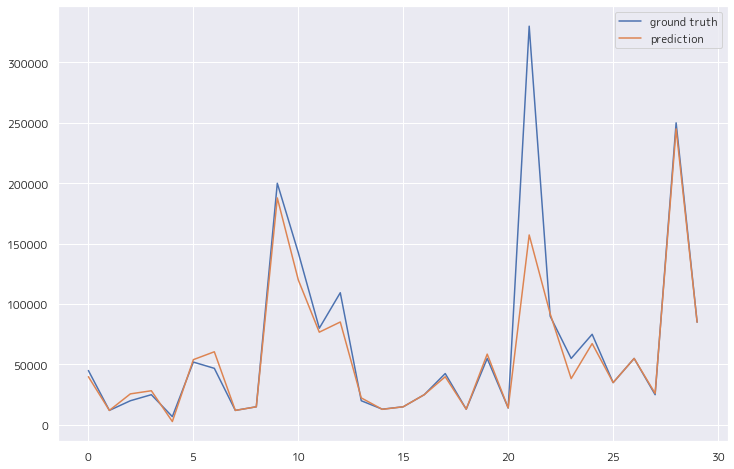

In [112]:
# plt.rcParams['legend.numpoints'] = 1
# fig, ax = plt.subplots(figsize=(6,4))

# # plot a black line between the 
# # ith prediction and the ith ground truth 
# for i in range(len(y_pred)):
#     ax.plot([i,i],[y_pred[i], y_test[i]], c="k", linewidth=0.5)
# ax.plot(y_pred,'o', label='Prediction', color = 'g')
# ax.plot(y_test,'^', label='Ground Truth', color = 'r' )

# ax.set_xlim((-1,10))
# plt.xlabel('a')
# plt.ylabel('b')
# plt.title('test')

plt.figure(figsize=(12,8))
plt.plot(y_test.values[:30], label = 'ground truth')
plt.plot(y_pred[:30],label = 'prediction')
plt.legend()             
plt.show()


In [90]:
y_pred[:50]

array([ 39320.        ,  12000.        ,  25165.        ,  28879.7502    ,
         2786.        ,  54000.        ,  62779.78      ,  12090.        ,
        15000.        , 199033.50858   , 120000.        ,  75615.36333333,
        85165.5       ,  22550.        ,  12870.        ,  14999.99      ,
        25000.        ,  39496.41      ,  13000.        ,  58500.        ,
        15853.8096    , 162100.        ,  92000.        ,  39495.        ,
        67500.        ,  35000.        ,  55000.        ,  25850.        ,
       243006.95825   ,  85000.        ,  18006.07      ,  15050.        ,
        16256.28571429, 120066.66666667,  35000.        ,  26000.        ,
        15593.5908    ,  19586.66666667,  45000.        ,  25288.72      ,
        25000.        ,  98743.0074    ,  15774.9998    ,  98192.53227778,
        44500.        ,  12030.        ,  25000.        ,  29790.        ,
        17000.        , 104689.01      ])

In [89]:
y_test[:50].values

array([ 45000.  ,  12000.  ,  20000.  ,  25000.  ,   6843.  ,  52000.  ,
        46816.  ,  12000.  ,  15000.  , 200000.  , 142593.  ,  80000.  ,
       109392.  ,  20000.  ,  13000.  ,  14999.99,  25000.  ,  42500.  ,
        13000.  ,  55000.  ,  14000.  , 330000.  ,  90000.  ,  55000.  ,
        75000.  ,  35000.  ,  55000.  ,  25000.  , 250000.  ,  85000.  ,
        25000.  ,  12100.  ,  13200.  ,  80000.  ,  35000.  ,  26000.  ,
         6500.  ,  20000.  ,  50000.  ,  25000.  ,  25000.  , 100000.  ,
        15000.  ,  95000.  ,  40000.  ,  12000.  ,  25000.  ,  30000.  ,
        17000.  ,  80000.  ])

In [25]:
df_add_feat_hybrid.drop(df_add_feat_hybrid[df_add_feat_hybrid.apply(lambda x: (x['Model xe_車輌型式'] == 'unknown') and (x['Engine model_エンジン型式'] == 'unknown'),axis = 1)].index, inplace = True)

In [26]:
group  = df_add_feat_hybrid.groupby('Tên phụ tùng_商品名').apply(lambda x: x.groupby('Model xe_車輌型式').apply(lambda x: x.groupby('Engine model_エンジン型式')['Đơn giá bán hàng_売上単価'].count().to_dict()).to_dict()).to_dict()
group

{'その他車輌': {'AE100': {'5A-FE': 2},
  'AE91': {'5A-FE': 1},
  'BMD21': {'TD27': 1},
  'CM85HG': {'FD6-T': 1},
  'EE102': {'4E-FE': 3},
  'EE103': {'5E-FE': 5},
  'EE104': {'5E-FE': 2},
  'JZX90': {'1JZ-GE': 1},
  'K97': {'4M40': 1},
  'LR50': {'VG33E': 1},
  'PMD21': {'TD23': 1},
  'ST215': {'3S-GTE': 1},
  'SXV20': {'5S-FE': 1},
  'VF33CRFN': {'FSA': 1},
  'VZN130': {'3VZ-E': 1},
  'YN81': {'3Y-E': 1},
  'YV196495': {'VOLVO-B230': 1},
  'YV1MVA8R': {'VOLVO-D4204T': 1}},
 'アクスルセット（Ｆ．Ｒアクスル）個別': {'AE110': {'5A-FE': 1},
  'AE111': {'4A-FE': 1},
  'AT211': {'7A-FE': 1},
  'AT212': {'5A-FE': 1},
  'BU88': {'14B': 1},
  'CPGE24': {'KA20': 1},
  'CQGE25': {'KA24-DE': 2},
  'CWGE25': {'ZD30DDTI': 1, 'unknown': 1},
  'EL51': {'4E-FE': 1},
  'GX': {'1G-FE': 1},
  'GXS10': {'3Y-P': 1},
  'JZS151': {'unknown': 2},
  'JZS175': {'2JZ-FSE': 1},
  'LR50': {'VG33': 1},
  'LXS11': {'2LII-TE': 2},
  'LY31': {'2L': 1},
  'NZE121': {'1NZ-FE': 1},
  'PD6W': {'6G72': 2},
  'RGW40': {'TD42': 1},
  'RZH112': {'u

In [37]:
import json
with open('dataParts.txt', 'w', encoding='utf8') as convert_file:
     convert_file.write(str(group))

273672

In [113]:
data = pd.DataFrame({'Groundtruth':y_test[:30], 'Prediction':y_pred[:30]})
data.reset_index(drop=True)
data

,Groundtruth,Prediction
0,45000.00,39890.000000
1,12000.00,12000.000000
2,20000.00,25680.000000
3,25000.00,28265.300200
4,6843.00,2786.000000
5,52000.00,54000.000000
6,46816.00,60526.350000
7,12000.00,12000.000000
8,15000.00,15000.000000
9,200000.00,187849.999200


,Groundtruth,Prediction
140578,45000.00,39890.000000
81623,12000.00,12000.000000
55514,20000.00,25680.000000
76223,25000.00,28265.300200
18194,6843.00,2786.000000
19398,52000.00,54000.000000
122503,46816.00,60526.350000
89005,12000.00,12000.000000
80339,15000.00,15000.000000
101319,200000.00,187849.999200


In [128]:
list_car_model_data = list(df_add_feat_hybrid['Model xe_車輌型式'].dropna().unique())
list_car_model_auction = list(df['vehicle_type'].dropna().unique())
list_common_car_model =  list(set(list_car_model_auction).intersection(list_car_model_data))
len(list_common_car_model)

2381

In [132]:
df_add_feat_hybrid.columns

Index(['Vị trí_ロケーション', 'Ngày bán hàng_売上日', 'Tháng bán hàng_売上月',
       'Năm bán hàng_売上年', 'Ngày nhập_入力日', 'Đầu vào tháng_入力月',
       'Năm đầu vào_入力年', 'Bộ phận bán hàng_売上部門', 'Người bán hàng_売上担当',
       'Phân loại bán hàng_売上分類', 'Mã đích bán hàng_売上先コード',
       'Tên khách hàng_売上先名', 'Số nhập kho_入庫番号', 'Mã loại phụ tùng_商品コード',
       'Tên phụ tùng_商品名', 'Nhà sản xuất_メーカー', 'Tên xe_車名', 'Model xe_車輌型式',
       'Engine model_エンジン型式', 'Số lượng_数量', 'Đơn giá bán hàng_売上単価',
       'Sản lượng bán ra_売上金額', 'Đơn giá mua_仕入単価', 'Tổng giá nhập_仕入合計',
       'Tiền công_工賃', 'Chi phí_経費', 'Nguồn nhập hàng_仕入先',
       'Bộ phận mua hàng_仕入部門', 'Nhân viên thu mua_仕入担当',
       'Phụ trách sản xuất_生産担当', 'Truyền động 1_駆動1', 'TM_TM',
       'Truyền động 2_駆動2', 'Chi tiết_詳細', 'Phí tái chế_リサイクル料',
       'Số km đã chạy_走行距離', 'Năm sản xuất_年式',
       'Phân loại mang đến/đón_持込・引取区分', 'Tình trạng engine_エンジン状態',
       'Đã gửi tiền_預託済', 'Loại xe_車種', 'Đang tải nguồn_積込元',
       'C

In [133]:
filter_data_sell = df_add_feat_hybrid[df_add_feat_hybrid['Model xe_車輌型式'].isin(list_common_car_model)]
filter_data_sell = filter_data_sell[filter_data_sell['Tên phụ tùng_商品名'] == 'エンジン']
filter_data_sell = filter_data_sell[['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式','Tháng bán hàng_売上月','Năm bán hàng_売上年','Đơn giá bán hàng_売上単価']]

In [134]:
filter_data_sell.isnull().sum()

Tên phụ tùng_商品名         0
Model xe_車輌型式            0
Engine model_エンジン型式      3
Tháng bán hàng_売上月       0
Năm bán hàng_売上年         0
Đơn giá bán hàng_売上単価    0
dtype: int64

In [135]:
filter_data_sell.dropna(inplace=True)

In [144]:
a = filter_data_sell.groupby(['Model xe_車輌型式']).size().sort_values(ascending = False)
a.loc['NHP10']

78

In [164]:
filter_data_auction = df[df['vehicle_type'].isin(list_common_car_model)]
filter_data_auction = filter_data_auction[filter_data_auction['vehicle_type'].isin(list_top4_model_car_aution)]
filter_data_auction

,id,venue_name,event_at,exhibit_no,age,car_name1,car_name2,raw_vehicle_type,vehicle_type,manufacture_name,displacement,mileage,color,rating,price,status,system_code,system_foreign_key,month,year
28,124348,ＪＵ埼玉,2021-10-19,45,2012.0,ﾀﾝﾄ,ｶｽﾀﾑX,L375S,L375S,ﾀﾞｲﾊﾂ,660.0,60384,ｼﾙﾊﾞｰ,4.0,410000,落札,JUNAVI,2071,10,2021
32,124352,ＪＵ埼玉,2021-10-19,54,2008.0,ﾀﾝﾄ,ｶｽﾀﾑX LTD,L375S,L375S,ﾀﾞｲﾊﾂ,660.0,114799,ﾌﾞﾙｰ,3.0,84000,落札,JUNAVI,2071,10,2021
67,124387,ＪＵ埼玉,2021-10-19,129,2008.0,ﾀﾝﾄ,ｶｽﾀﾑX LTD,L375S,L375S,ﾀﾞｲﾊﾂ,660.0,17929,ｺﾞｰﾙﾄﾞ,4.0,365000,落札,JUNAVI,2071,10,2021
73,124393,ＪＵ埼玉,2021-10-19,150,2011.0,ﾀﾝﾄ,ｶｽﾀﾑRSﾀｰﾎﾞ,L375S,L375S,ﾀﾞｲﾊﾂ,660.0,137287,ｸﾛ,3.5,140000,落札,JUNAVI,2071,10,2021
114,124434,ＪＵ埼玉,2021-10-19,297,2009.0,ﾀﾝﾄ,L,L375S,L375S,ﾀﾞｲﾊﾂ,660.0,80939,ﾛｰｽﾞ,4.0,50000,商談落札,JUNAVI,2071,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056851,1056852,ＴＡＡ中部,2022-03-03,4203,2011.0,ﾌﾟﾘｳｽ,Sﾂｰﾘﾝｸﾞｾﾚｸｼｮﾝ,ZVW30,ZVW30,ﾄﾖﾀ,1800.0,210000,ﾊﾟｰﾙ,3.5,335000,落札,JUNAVI,17541,3,2022
1056852,1056853,ＴＡＡ中部,2022-03-03,4204,2013.0,ｱｸｱ,S,NHP10,NHP10,ﾄﾖﾀ,1500.0,179000,ｵﾚﾝｼﾞ,3.5,250000,落札,JUNAVI,17541,3,2022
1056922,1056922,ＴＡＡ中部,2022-03-03,4273,2009.0,ﾀﾝﾄ,Xﾘﾐﾃｯﾄﾞｾﾚｸｼｮﾝ,L375S,L375S,ﾀﾞｲﾊﾂ,660.0,106000,ﾍﾞｰｼﾞｭ,4,58000,落札,JUNAVI,17541,3,2022
1056924,1056924,ＴＡＡ中部,2022-03-03,4275,2013.0,ﾉｰﾄ,NaN,E12,E12,ﾆｯｻﾝ,1200.0,115000,ﾐｽﾞｲﾛ,R,104000,落札,JUNAVI,17541,3,2022


In [148]:
b = filter_data_auction.groupby(['vehicle_type']).size().sort_values(ascending = False)
list_top4_model_car_aution = list(b.index[:4])
list_top4_model_car_aution

['NHP10', 'ZVW30', 'L375S', 'E12']

In [153]:
filter_data_sell = filter_data_sell[filter_data_sell['Model xe_車輌型式'].isin(list_top4_model_car_aution)]
filter_data_sell

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Tháng bán hàng_売上月,Năm bán hàng_売上年,Đơn giá bán hàng_売上単価
3791,エンジン,ZVW30,2ZR-FXE,1,2018,13970.0
5325,エンジン,ZVW30,2ZR-FXE,1,2018,13059.0
5375,エンジン,ZVW30,2ZR-FXE,9,2019,50000.0
5461,エンジン,NHP10,1NZ-FXE,5,2019,12720.0
6562,エンジン,ZVW30,2ZR-FXE,1,2018,30000.0
...,...,...,...,...,...,...
196236,エンジン,NHP10,1NZ-FXE,10,2020,35000.0
196607,エンジン,E12,HR12DE,11,2020,40000.0
197065,エンジン,NHP10,1NZ-FXE,1,2021,15000.0
242589,エンジン,NHP10,1NZ-FXE,9,2021,40000.0


,Model xe_車輌型式,year,month,median_NHP10
0,NHP10,2021,10,393000
1,NHP10,2021,11,404000
2,NHP10,2021,12,400000
3,NHP10,2022,1,439000
4,NHP10,2022,2,454000
5,NHP10,2022,3,436000


,Model xe_車輌型式,Engine model_エンジン型式,year,month,median_NHP10_1NZ-FXE
29,NHP10,1NZ-FXE,2021,1,25000.0
30,NHP10,1NZ-FXE,2021,3,50000.0
31,NHP10,1NZ-FXE,2021,4,12472.0
32,NHP10,1NZ-FXE,2021,6,50000.0
33,NHP10,1NZ-FXE,2021,7,50000.0
34,NHP10,1NZ-FXE,2021,8,45000.0
35,NHP10,1NZ-FXE,2021,9,35000.0
36,NHP10,1NZ-FXE,2021,10,36000.0
37,NHP10,1NZ-FXE,2021,12,35000.0
38,NHP10,1NZ-FXE,2022,1,36500.0


,Model xe_車輌型式,year,month,median_NHP10,Engine model_エンジン型式,median_NHP10_1NZ-FXE
0,NHP10,2021,10,393000,1NZ-FXE,36000.0
2,NHP10,2021,12,400000,1NZ-FXE,35000.0
3,NHP10,2022,1,439000,1NZ-FXE,36500.0
4,NHP10,2022,2,454000,1NZ-FXE,42000.0


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='median_NHP10', ylabel='median_NHP10_1NZ-FXE'>

,Model xe_車輌型式,year,month,median_ZVW30
0,ZVW30,2021,10,291000
1,ZVW30,2021,11,309000
2,ZVW30,2021,12,302000
3,ZVW30,2022,1,331000
4,ZVW30,2022,2,346000
5,ZVW30,2022,3,331000


,Model xe_車輌型式,Engine model_エンジン型式,year,month,median_ZVW30_2ZR-FXE
30,ZVW30,2ZR-FXE,2021,1,55000.0
31,ZVW30,2ZR-FXE,2021,2,50000.0
32,ZVW30,2ZR-FXE,2021,3,54250.0
33,ZVW30,2ZR-FXE,2021,4,49250.0
34,ZVW30,2ZR-FXE,2021,5,48500.0
35,ZVW30,2ZR-FXE,2021,6,57500.0
36,ZVW30,2ZR-FXE,2021,7,53750.0
37,ZVW30,2ZR-FXE,2021,8,50000.0
38,ZVW30,2ZR-FXE,2021,9,48750.0
39,ZVW30,2ZR-FXE,2021,10,54500.0


,Model xe_車輌型式,year,month,median_ZVW30,Engine model_エンジン型式,median_ZVW30_2ZR-FXE
0,ZVW30,2021,10,291000,2ZR-FXE,54500.0
1,ZVW30,2021,11,309000,2ZR-FXE,53643.0


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='median_ZVW30', ylabel='median_ZVW30_2ZR-FXE'>

,Model xe_車輌型式,Engine model_エンジン型式,year,month,median_ZVW30_2ZR-FE
30,ZVW30,2ZR-FXE,2021,1,55000.0
31,ZVW30,2ZR-FXE,2021,2,50000.0
32,ZVW30,2ZR-FXE,2021,3,54250.0
33,ZVW30,2ZR-FXE,2021,4,49250.0
34,ZVW30,2ZR-FXE,2021,5,48500.0
35,ZVW30,2ZR-FXE,2021,6,57500.0
36,ZVW30,2ZR-FXE,2021,7,53750.0
37,ZVW30,2ZR-FXE,2021,8,50000.0
38,ZVW30,2ZR-FXE,2021,9,48750.0
39,ZVW30,2ZR-FXE,2021,10,54500.0


,Model xe_車輌型式,year,month,median_ZVW30,Engine model_エンジン型式,median_ZVW30_2ZR-FE
0,ZVW30,2021,10,291000,2ZR-FXE,54500.0
1,ZVW30,2021,11,309000,2ZR-FXE,53643.0


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='median_ZVW30', ylabel='median_ZVW30_2ZR-FE'>

,Model xe_車輌型式,year,month,median_L375S
0,L375S,2021,10,118000
1,L375S,2021,11,123000
2,L375S,2021,12,115500
3,L375S,2022,1,138000
4,L375S,2022,2,138000
5,L375S,2022,3,142000


,Model xe_車輌型式,Engine model_エンジン型式,year,month,median_L375S_KF-VE
2,L375S,KF-VE,2021,4,28000.0


,Model xe_車輌型式,year,month,median_L375S,Engine model_エンジン型式,median_L375S_KF-VE


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='median_L375S'>

,Model xe_車輌型式,year,month,median_E12
0,E12,2021,10,276000
1,E12,2021,11,267000
2,E12,2021,12,251000
3,E12,2022,1,296000
4,E12,2022,2,303000
5,E12,2022,3,337000


,Model xe_車輌型式,Engine model_エンジン型式,year,month,median_E12_HR12-DDR
5,E12,HR12DDR,2021,6,50000.0
6,E12,HR12DDR,2021,9,45000.0
29,E12,HR12DE,2021,5,50000.0
30,E12,HR12DE,2021,7,45000.0
31,E12,HR12DE,2021,10,12000.0
32,E12,HR12DE,2022,1,43500.0


,Model xe_車輌型式,year,month,median_E12,Engine model_エンジン型式,median_E12_HR12-DDR
0,E12,2021,10,276000,HR12DE,12000.0
3,E12,2022,1,296000,HR12DE,43500.0


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='median_E12', ylabel='median_E12_HR12-DDR'>

,Model xe_車輌型式,Engine model_エンジン型式,year,month,median_E12_HR12DE
5,E12,HR12DDR,2021,6,50000.0
6,E12,HR12DDR,2021,9,45000.0
29,E12,HR12DE,2021,5,50000.0
30,E12,HR12DE,2021,7,45000.0
31,E12,HR12DE,2021,10,12000.0
32,E12,HR12DE,2022,1,43500.0


,Model xe_車輌型式,year,month,median_E12,Engine model_エンジン型式,median_E12_HR12DE
0,E12,2021,10,276000,HR12DE,12000.0
3,E12,2022,1,296000,HR12DE,43500.0


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='median_E12', ylabel='median_E12_HR12DE'>

,Model xe_車輌型式,Engine model_エンジン型式,year,month,median_E12_HR12DDR
5,E12,HR12DDR,2021,6,50000.0
6,E12,HR12DDR,2021,9,45000.0
29,E12,HR12DE,2021,5,50000.0
30,E12,HR12DE,2021,7,45000.0
31,E12,HR12DE,2021,10,12000.0
32,E12,HR12DE,2022,1,43500.0


,Model xe_車輌型式,year,month,median_E12,Engine model_エンジン型式,median_E12_HR12DDR
0,E12,2021,10,276000,HR12DE,12000.0
3,E12,2022,1,296000,HR12DE,43500.0


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='median_E12', ylabel='median_E12_HR12DDR'>

,Model xe_車輌型式,Engine model_エンジン型式,year,month,median_E12_HR16DE
5,E12,HR12DDR,2021,6,50000.0
6,E12,HR12DDR,2021,9,45000.0
29,E12,HR12DE,2021,5,50000.0
30,E12,HR12DE,2021,7,45000.0
31,E12,HR12DE,2021,10,12000.0
32,E12,HR12DE,2022,1,43500.0


,Model xe_車輌型式,year,month,median_E12,Engine model_エンジン型式,median_E12_HR16DE
0,E12,2021,10,276000,HR12DE,12000.0
3,E12,2022,1,296000,HR12DE,43500.0


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='median_E12', ylabel='median_E12_HR16DE'>

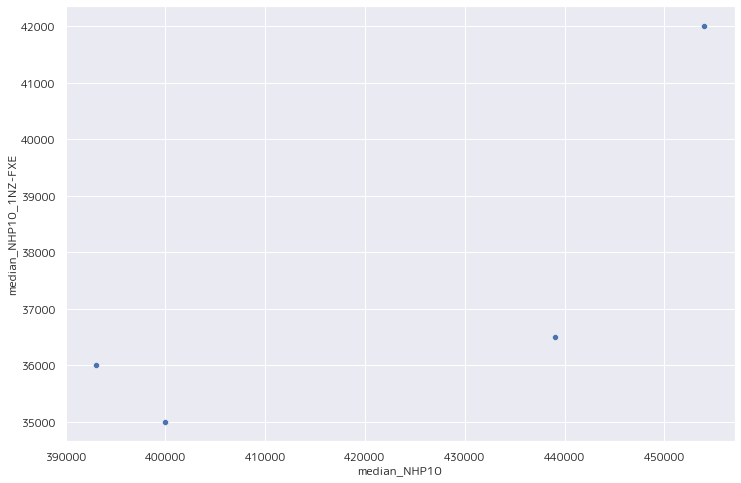

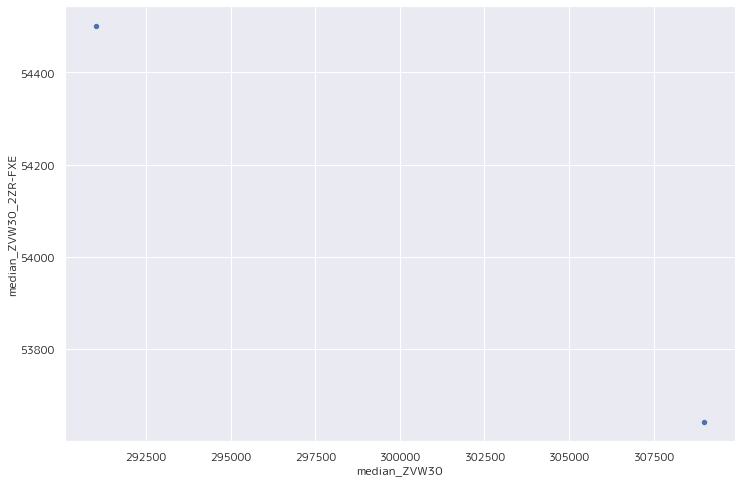

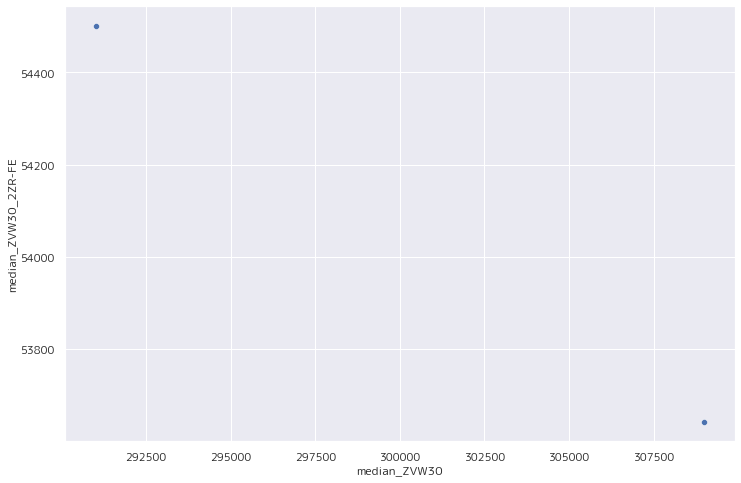

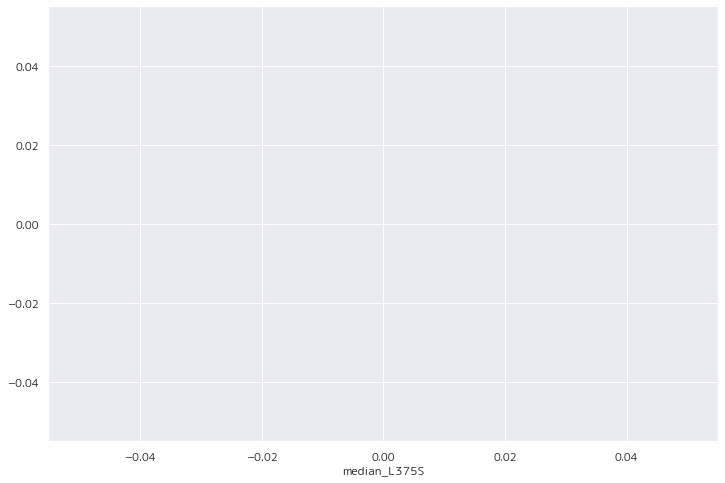

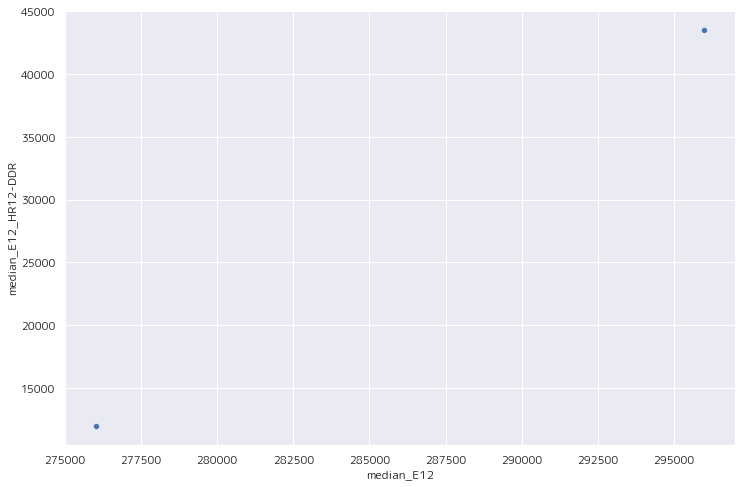

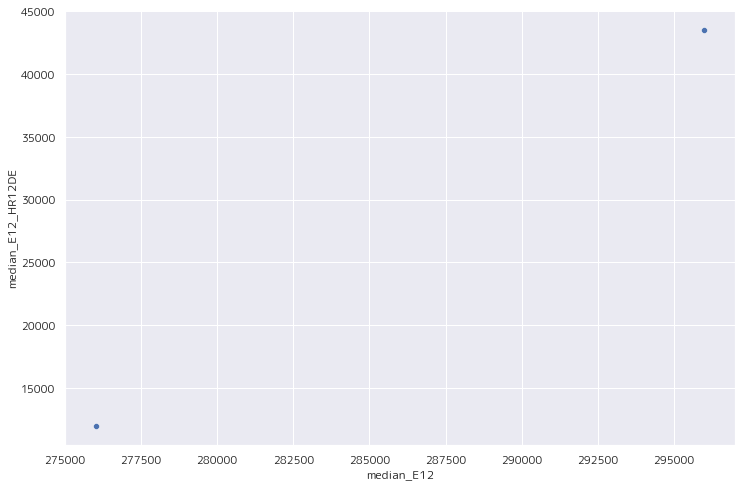

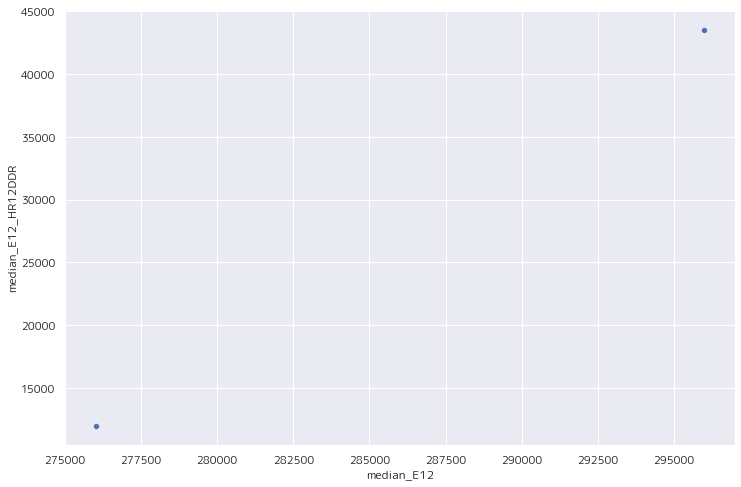

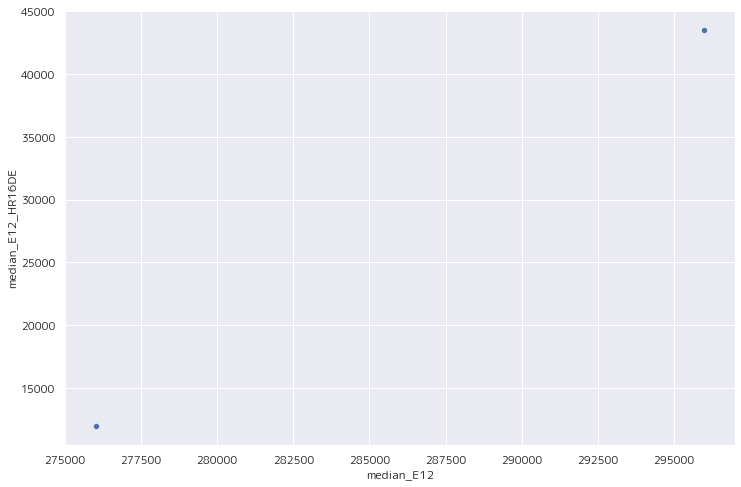

In [179]:
for model in list_top4_model_car_aution:
    globals()[f'df_{model}_sell'.replace('-','')] = filter_data_sell[filter_data_sell['Model xe_車輌型式'] == model]
    globals()[f'group_{model}_auction'.replace('-','')] = filter_data_auction[filter_data_auction['vehicle_type'] == model].groupby(['vehicle_type','year','month'])['price'].median().reset_index(name = f'median_{model}')
    globals()[f'group_{model}_auction'.replace('-','')].rename(columns = {'vehicle_type':'Model xe_車輌型式'},inplace = True)
    globals()[f'group_{model}_auction'.replace('-','')]
    list_unique_engine = list(globals()[f'df_{model}_sell'.replace('-','')]['Engine model_エンジン型式'].dropna().unique())
    for engine in list_unique_engine:
         group_engine = globals()[f'df_{model}_sell'.replace('-','')][globals()[f'df_{model}_sell'.replace('-','')]['Engine model_エンジン型式'] == engine]
         group_engine = globals()[f'df_{model}_sell'.replace('-','')].groupby(['Model xe_車輌型式','Engine model_エンジン型式','Năm bán hàng_売上年','Tháng bán hàng_売上月'])['Đơn giá bán hàng_売上単価'].median().reset_index(name=f'median_{model}_{engine}')
         group_engine  = group_engine[group_engine['Năm bán hàng_売上年'] >= 2021]
         group_engine.rename(columns={"Năm bán hàng_売上年":"year","Tháng bán hàng_売上月":"month"},inplace = True)
         group_engine
         data_join = pd.merge(globals()[f'group_{model}_auction'.replace('-','')], group_engine, on=['Model xe_車輌型式','year','month'],how = 'left')
         data_join.dropna()
         plt.figure(figsize=(12,8))
         sns.scatterplot(x= f'median_{model}',y = f'median_{model}_{engine}',data = data_join)
         